In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input/chest_xray/chest_xray"))

# Any results you write to the current directory are saved as output.

['test', 'val', '.DS_Store', 'train']


In [2]:
from fastai import*
from fastai.vision import*

In [3]:
path=Path("../input/chest_xray/chest_xray/test")

In [4]:
fnames = get_image_files(path/'PNEUMONIA') 
#fnames += get_image_files(path/'NORMAL')
fnames[:5]

[PosixPath('../input/chest_xray/chest_xray/test/PNEUMONIA/person78_bacteria_382.jpeg'),
 PosixPath('../input/chest_xray/chest_xray/test/PNEUMONIA/person122_bacteria_586.jpeg'),
 PosixPath('../input/chest_xray/chest_xray/test/PNEUMONIA/person119_bacteria_565.jpeg'),
 PosixPath('../input/chest_xray/chest_xray/test/PNEUMONIA/person133_bacteria_634.jpeg'),
 PosixPath('../input/chest_xray/chest_xray/test/PNEUMONIA/person122_bacteria_582.jpeg')]

torch.Size([3, 712, 1096])


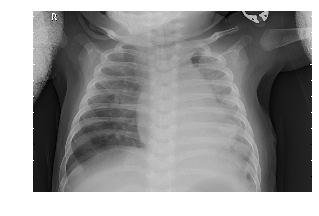

In [5]:
img=fnames[-1]
f=open_image(img)
f.show(figsize=(5,5))
print(f.shape)


In [6]:
np.random.seed(2)
pat=re.compile(r'\d+_(\w+)_')

In [7]:
data = ImageDataBunch.from_name_re(path/'PNEUMONIA',fnames,pat,valid_pct=0.2, size=224,bs=5, num_workers=0
                                  ).normalize(imagenet_stats)

In [8]:
print(data.classes)
len(data.classes),data.c

['bacteria', 'virus']


(2, 2)

In [9]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy, model_dir='/tmp/models')

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /tmp/.torch/models/resnet34-333f7ec4.pth
87306240it [00:01, 52617703.94it/s]


In [10]:
lr_find(learn)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


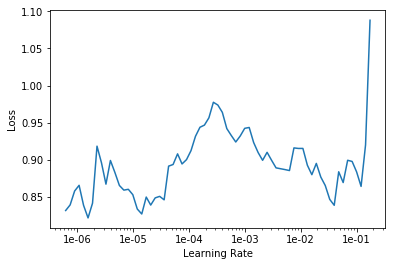

In [11]:
learn.recorder.plot()

In [12]:
lr=1e-2

In [13]:
learn.fit_one_cycle(5,slice(lr))

In [14]:
learn.save('stage-1')
learn.fit_one_cycle(4,slice(8*1e-3))

In [15]:
learn.save('stage-2')

bacteria
bacteria
virus
bacteria
virus
virus
virus
virus
done


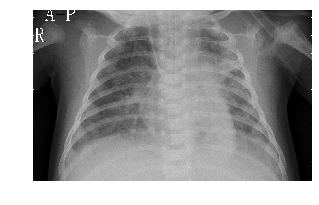

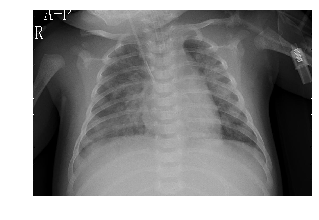

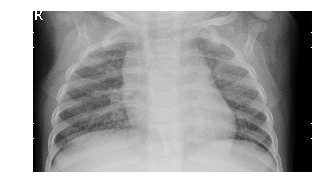

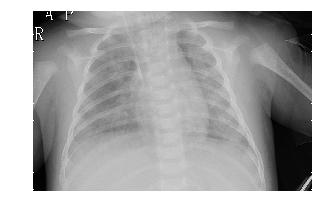

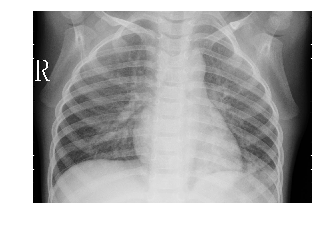

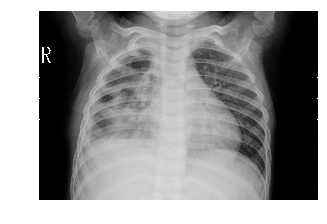

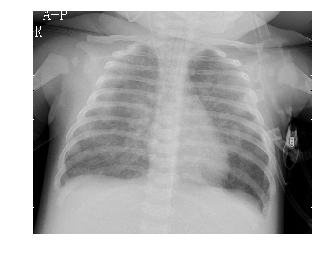

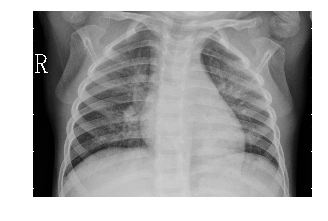

In [16]:
path2=Path("../input/chest_xray/chest_xray/val/PNEUMONIA")
fnames = get_image_files(path2)

i=0
try:
    while fnames[i]:
        img = open_image(fnames[i])
        classes=['bacteria', 'virus']
        data2 = ImageDataBunch.single_from_classes(path, classes, size=224).normalize(imagenet_stats)
        learn = cnn_learner(data2, models.resnet34, model_dir='/tmp/models').load('stage-2')
        pred_class,pred_idx,outputs = learn.predict(img)
        print(pred_class)
        img.show(figsize=(5,5))
        i=i+1
except IndexError:
    print('done')

In [17]:
learn.load('stage-1')
from IPython.display import FileLinks
FileLinks('/tmp')

/tmp/
  tmp_e0ju9f8.json
/tmp/.cache/matplotlib/
  fontlist-v300.json
/tmp/.ipython/profile_default/
  history.sqlite
/tmp/.ipython/profile_default/startup/
  README
/tmp/.torch/models/
  resnet34-333f7ec4.pth
/tmp/models/
  stage-2.pth
  tmp.pth
  stage-1.pth